# **Notebook Summary**

This notebook demonstrates how to generate captions for crime-related images using a pretrained ViT-GPT2 VisionEncoderDecoder model fine-tuned on the UCA-UCF dataset. It loads the appropriate model, tokenizer, and image processor, and creates a Hugging Face pipeline for image-to-text generation. The notebook provides two workflows: (1) reading image paths from a CSV file and generating captions for each image, and (2) directly captioning and displaying images from a local folder using matplotlib. This tool serves as a visual evaluation method to assess the model's ability to describe complex and sensitive scenes from surveillance footage.

In [ ]:
import pandas as pd
from transformers import VisionEncoderDecoderModel, GPT2Tokenizer, ViTImageProcessor, pipeline

# Load the model
#model_path= "NourFakih/Vit-GPT2-UCA-UCF-04"
model_path= "NourFakih/Vit-GPT2-UCA-UCF-01"
model = VisionEncoderDecoderModel.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
feature_extractor = ViTImageProcessor.from_pretrained("NourFakih/Vit-GPT2-UCA-UCF-02")


# # Create the pipeline
image_captioner_1 = pipeline(
    task="image-to-text",
    model=model,
    tokenizer=tokenizer,
    feature_extractor=feature_extractor
)



#image_caption_and_display_multiple(image_paths, image_captioner_1)

In [2]:


# # Read the CSV file into a DataFrame
# csv_path = '/kaggle/input/uca-ucf-dataset/Test_ds (3).csv'
# df = pd.read_csv(csv_path)

# # Function to generate caption for a single image
# def generate_caption(image_path, caption_pipeline):
#     try:
#         # The pipeline returns a list of dictionaries; extract the generated text
#         result = caption_pipeline(image_path)
#         caption = result[0]['generated_text'] if result else ""
#         return caption
#     except Exception as e:
#         print(f"Error processing {image_path}: {e}")
#         return ""

# # Apply the function on the 'image_path' column and store results in a new column
# df['gen-caption'] = df['image_path'].apply(lambda x: generate_caption(x, image_captioner_1))

# # Optionally, save the updated DataFrame to a new CSV file
# output_csv_path = 'gen-caption.csv'
# df.to_csv(output_csv_path, index=False)

# print("Image caption generation completed and saved to:", output_csv_path)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


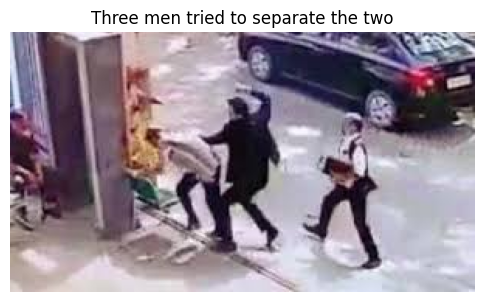

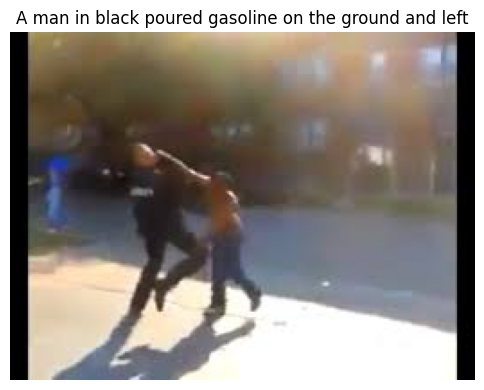

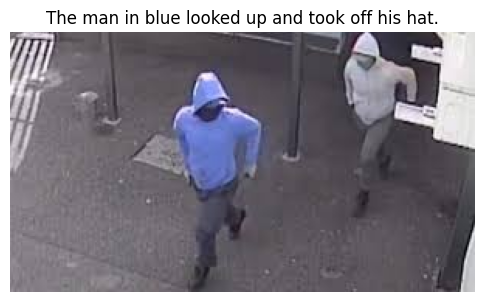

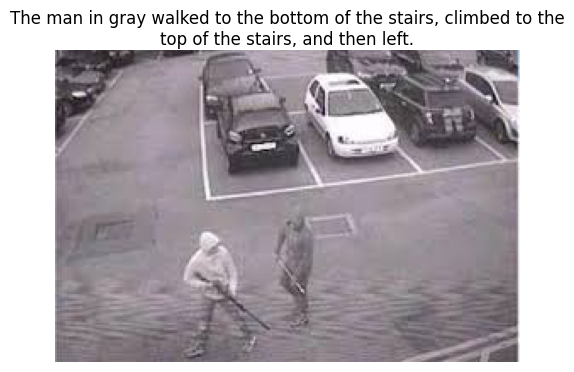

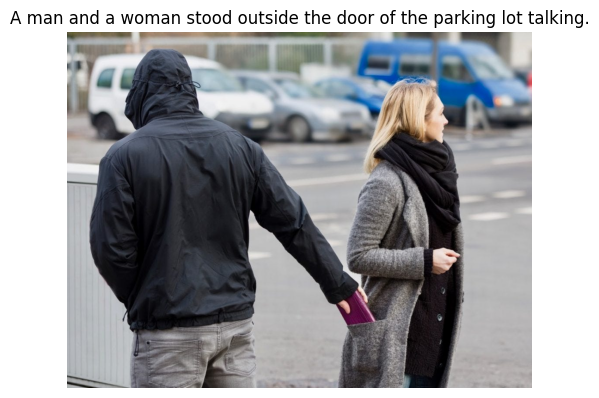

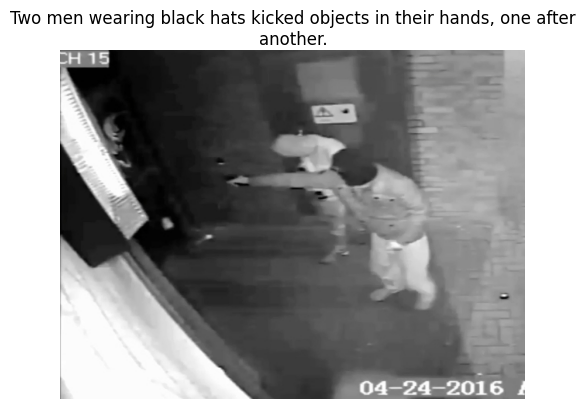

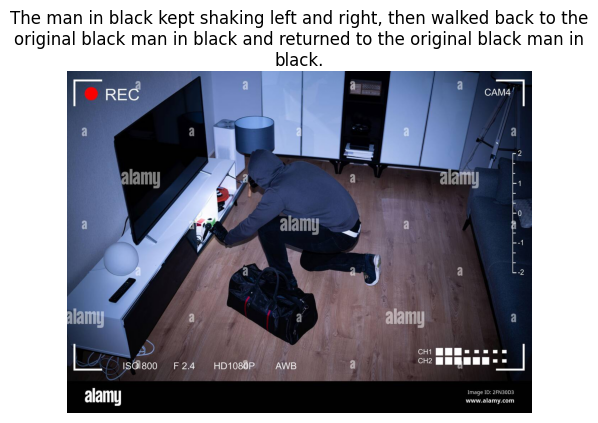

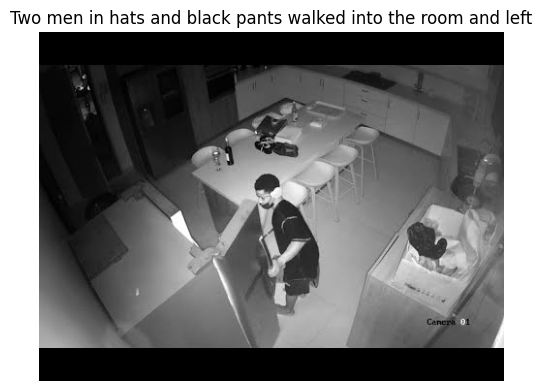

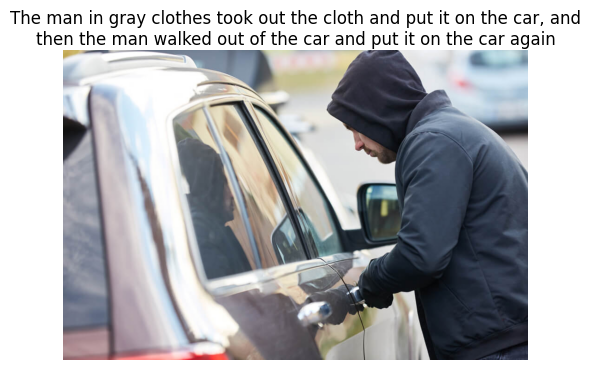

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from transformers import VisionEncoderDecoderModel, GPT2Tokenizer, ViTFeatureExtractor, pipeline

# Define paths
image_dir = "/kaggle/input/test-ucf-uca"

# # Load model components
# model_path = "/kaggle/working/Vit-GPT2-UCA-UCF-04/checkpoint-7686"
# model = VisionEncoderDecoderModel.from_pretrained(model_path)
# tokenizer = GPT2Tokenizer.from_pretrained(model_path)
# feature_extractor = ViTFeatureExtractor.from_pretrained(model_path)

# Create the image-to-text pipeline
# image_captioner_1 = pipeline(
#     task="image-to-text",
#     model=model,
#     tokenizer=tokenizer,
#     feature_extractor=feature_extractor
# )

# Function to caption and display images
def image_caption_and_display_multiple(image_dir, captioner):
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(("png", "jpg", "jpeg"))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        # Generate caption
        caption = image_captioner_1( image, max_new_tokens=70)[0]['generated_text']
      #  caption = captioner(image)[0]["generated_text"]

        # Display image with caption
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(caption, fontsize=12, wrap=True)
        plt.show()

# Apply the function to process images
image_caption_and_display_multiple(image_dir, image_captioner_1)